In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


import seaborn as sns
import warnings
import os
from scipy.interpolate import griddata


''
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.callbacks import ModelCheckpoint


from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

import meshio
import re

## Training of model with MSE and RMSProp'

In [47]:
import cfdnetplus

case with linear interpolation in the training data set( check if cfdnetplu.extract2d_xy.py is set to linear) and linear interpolation in the the prediction. 
Also the domain is smaller please check that the doamin is <b>-50 to 50</b> in x and <b>-30 to 30</b> in y direction.

In [48]:
path_to_main= 'airfoil2d/'
folders=['airFoil_1000', 'airFoil_30', 'airFoil_300','airFoil_600', 'airFoil_3000', 'airFoil_2000']
fields= ['U','p','k','omega', 'nut']
xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05
modelid='model_mse_rmsprop'

In [5]:
cfdnetplus.VTK2np(path_to_main,folders, fields,'xy' ,xres,yres,xlim,ylim,zcut)

processing data in airfoil2d/airFoil_1000/VTK/
airfoil2d/airFoil_1000/VTK/airFoil_1000_0/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_1/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_10/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_100/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_101/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_102/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_103/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_104/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_105/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_106/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_107/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_108/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_109/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_11/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_110/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_111/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_112/int

airfoil2d/airFoil_1000/VTK/airFoil_1000_228/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_229/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_23/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_230/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_231/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_232/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_233/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_234/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_235/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_236/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_237/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_238/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_239/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_24/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_240/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_241/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_242/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoi

airfoil2d/airFoil_1000/VTK/airFoil_1000_54/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_55/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_56/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_57/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_58/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_59/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_6/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_60/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_61/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_62/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_63/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_64/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_65/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_66/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_67/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_68/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_69/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_7/interna

airfoil2d/airFoil_30/VTK/airFoil_30_189/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_19/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_190/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_191/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_192/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_193/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_194/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_195/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_196/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_197/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_198/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_199/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_2/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_20/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_200/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_201/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_202/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_203/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_204/internal.v

airfoil2d/airFoil_30/VTK/airFoil_30_328/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_329/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_33/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_330/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_331/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_332/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_333/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_334/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_335/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_336/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_337/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_338/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_339/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_34/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_340/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_341/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_342/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_343/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_344/internal

airfoil2d/airFoil_30/VTK/airFoil_30_468/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_469/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_47/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_470/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_471/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_472/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_473/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_474/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_475/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_476/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_477/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_478/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_479/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_48/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_480/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_481/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_482/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_483/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_484/internal

airfoil2d/airFoil_30/VTK/airFoil_30_69/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_7/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_70/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_71/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_72/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_73/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_74/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_75/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_76/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_77/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_78/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_79/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_8/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_80/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_81/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_82/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_83/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_84/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_85/internal.vtu
airfoil2d/airF

airfoil2d/airFoil_300/VTK/airFoil_300_203/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_204/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_205/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_206/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_207/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_208/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_209/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_21/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_210/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_211/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_212/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_213/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_214/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_215/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_216/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_217/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_218/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_219/internal.vtu
airfoil2d/a

airfoil2d/airFoil_300/VTK/airFoil_300_35/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_36/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_37/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_38/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_39/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_4/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_40/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_41/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_42/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_43/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_44/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_45/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_46/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_47/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_48/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_49/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_5/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_50/internal.vtu
airfoil2d/airFoil_300/VTK/airF

airfoil2d/airFoil_600/VTK/airFoil_600_17/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_170/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_171/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_172/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_173/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_174/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_175/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_176/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_177/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_178/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_179/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_18/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_180/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_181/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_182/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_183/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_184/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_185/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_600/VTK/airFoil_600_304/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_305/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_306/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_307/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_308/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_309/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_31/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_310/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_311/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_312/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_313/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_314/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_315/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_316/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_317/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_318/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_319/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_32/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_3000/VTK/airFoil_3000_134/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_135/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_136/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_137/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_138/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_139/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_14/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_140/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_141/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_142/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_143/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_144/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_145/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_146/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_147/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_148/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_149/internal.vtu
airfoil2d/airFoil_3000/VTK/airFo

airfoil2d/airFoil_3000/VTK/airFoil_3000_264/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_265/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_266/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_267/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_268/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_269/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_27/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_270/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_271/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_272/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_273/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_274/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_275/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_276/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_277/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_278/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_279/internal.vtu
airfoil2d/airFoil_3000/VTK/airFo

airfoil2d/airFoil_3000/VTK/airFoil_3000_90/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_91/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_92/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_93/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_94/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_95/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_96/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_97/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_98/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_99/internal.vtu
(340, 66, 256, 7)
340
[267]
data written toairfoil2d/airFoil_3000/VTK/df
processing data in airfoil2d/airFoil_2000/VTK/
airfoil2d/airFoil_2000/VTK/airFoil_2000_0/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_1/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_10/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_100/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_101/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_

airfoil2d/airFoil_2000/VTK/airFoil_2000_218/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_219/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_22/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_220/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_221/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_222/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_223/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_224/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_225/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_226/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_227/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_228/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_229/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_23/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_230/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_231/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_232/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoi

airfoil2d/airFoil_2000/VTK/airFoil_2000_43/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_44/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_45/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_46/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_47/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_48/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_49/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_5/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_50/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_51/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_52/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_53/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_54/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_55/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_56/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_57/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_58/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_59/intern

['airfoil2d/airFoil_1000/VTK/',
 'airfoil2d/airFoil_30/VTK/',
 'airfoil2d/airFoil_300/VTK/',
 'airfoil2d/airFoil_600/VTK/',
 'airfoil2d/airFoil_3000/VTK/',
 'airfoil2d/airFoil_2000/VTK/']

In [49]:

df = np.empty((0,66,256,7))
df_label = np.empty((0,66,256,7))
path_to_folders=[]
for i in folders:
    path_to_folders.append(path_to_main+i+'/VTK/')
    df_t=np.load(path_to_main+i+'/VTK/df.npy')
    df_tlabel=np.load(path_to_main+i+'/VTK/df_label.npy')
    df=np.concatenate((df,df_t))
    df_label=np.concatenate((df_label,df_tlabel))
print(df_label.shape)

(2295, 66, 256, 7)


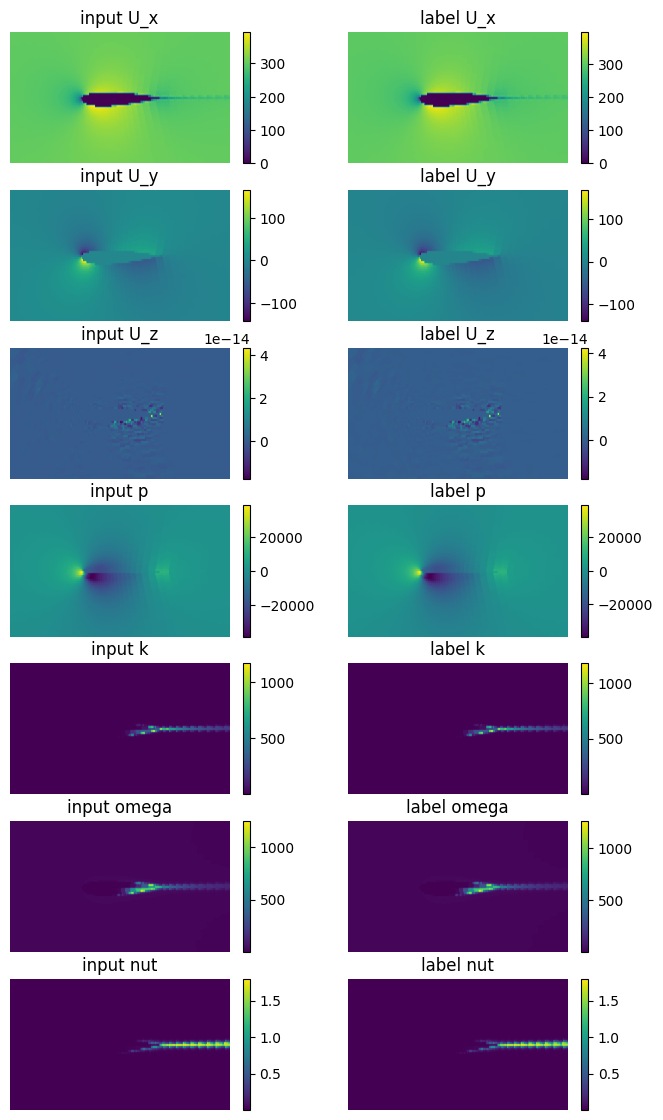

In [7]:

n=1000
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=df.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(df[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(df_label[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('label '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

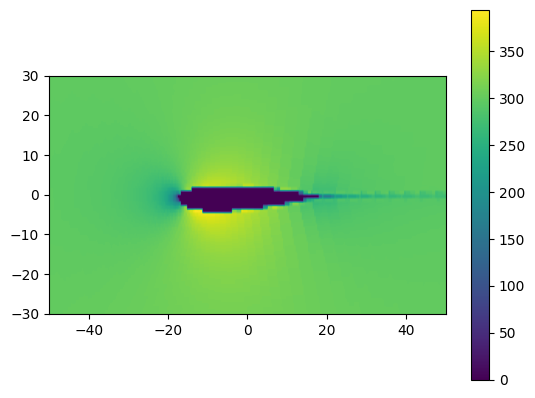

In [6]:
plt.imshow(df[1000,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.colorbar()

In [50]:
#normalise U Vektors
U_max=np.max(abs(df[:,:,:,[0,1,2]]))
p_max=np.max(abs(df[:,:,:,[3]]))
k_max=np.max(abs(df[:,:,:,[4]]))
omega_max=np.max(abs(df[:,:,:,[5]]))
nut_max=np.max(abs(df[:,:,:,[6]]))

model_path='cfdnetplus_models/'+modelid+'/'
normal=np.array([U_max,U_max,U_max, p_max,k_max, omega_max,nut_max]).reshape(1,1,1,7)
print(normal)

if os.path.isdir(model_path)== False:
    os.mkdir(model_path)
np.save(model_path+'normal',normal)


[[[[4.41323047e+03 4.41323047e+03 4.41323047e+03 7.33556320e+07
    2.83279031e+05 1.93653164e+04 4.86423264e+01]]]]


In [51]:
contents=''
for field in fields:
    contents=contents+field+ '\n'
print(contents)
with open(model_path+'fields',"w") as f:
            f.writelines(contents)
dims=np.array([xres,yres,xlim[0],xlim[1],ylim[0],ylim[1],zcut])
np.save(model_path+'dims',dims)

U
p
k
omega
nut



In [53]:
df1=df*1/normal
df_label1=df_label/normal

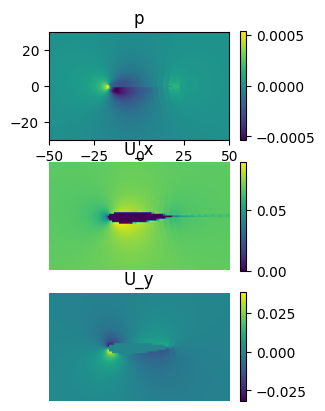

In [11]:
fig = plt.figure()

fig.add_subplot(3, 2, 1)
plt.imshow(df_label1[n,:,:,3],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('p')
plt.axis('on')
plt.colorbar()


fig.add_subplot(3, 2, 3)
plt.imshow(df_label1[n,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('U_x')
plt.axis('off')
plt.colorbar()

fig.add_subplot(3, 2, 5)
plt.imshow(df_label1[n,:,:,1],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('U_y')
plt.axis('off')

plt.colorbar()
plt.show()

In [109]:
train_data, test_data, label_train, label_test = train_test_split (df1, df_label1, test_size = 0.15)

20


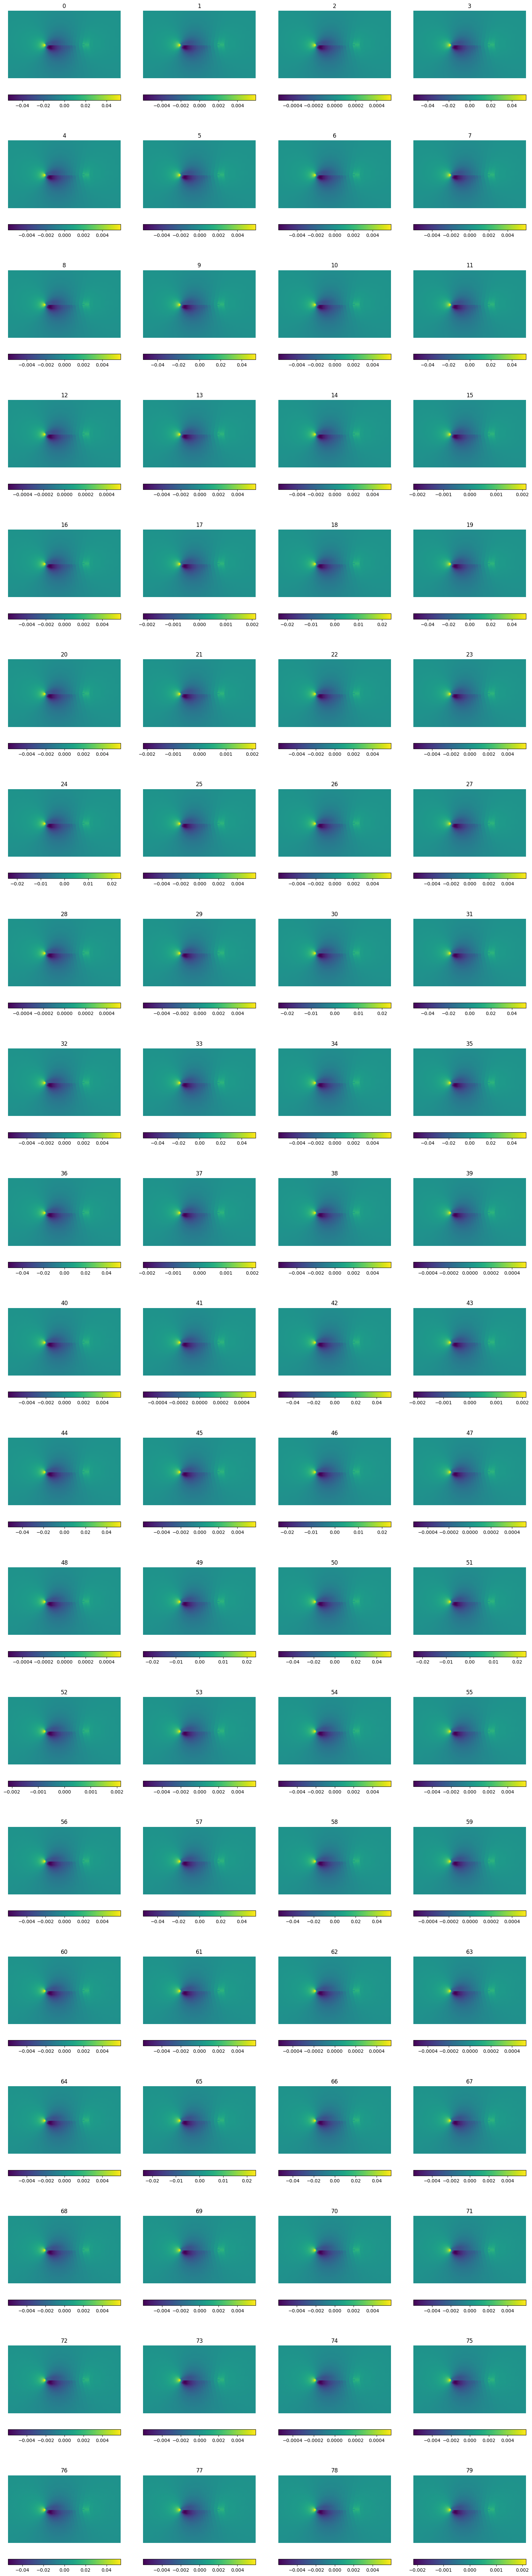

In [14]:
[a,b,c,d]=label_train.shape
fig = plt.figure(figsize=(20, 100))
columns = 4
rows = 20
print(rows)

for i in range( columns * rows):
    img = label_train[(i-1),:,:,3]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(i)
    plt.axis('off')
    plt.colorbar(location='bottom')

plt.show()

In [110]:
# Valid for input with four layers
model = models.Sequential()
model.add(layers.Conv2D(32,( 4,12), (2, 8), activation='tanh',padding="same", input_shape=(66,256, 7)))
model.add(layers.Conv2D(64,(6), (3, 4), activation='tanh',padding="same",))
model.add(layers.Conv2D(256,(16,12), (11, 8), activation='tanh',padding="same",))
model.add(layers.Conv2DTranspose(32,(14,10),(11,8), activation='tanh',padding="same"))
model.add(layers.Conv2DTranspose(16,(6,8),(3,4), activation='tanh',padding="same"))
model.add(layers.Conv2DTranspose(7,(4,16),(2,8), activation='PReLU', padding="same"))

In [111]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 33, 32, 32)        10784     
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 8, 64)         73792     
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 256)         3145984   
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 11, 8, 32)        1146912   
 Transpose)                                                      
                                                                 
 conv2d_transpose_19 (Conv2D  (None, 33, 32, 16)       24592     
 Transpose)                                                      
                                                                 
 conv2d_transpose_20 (Conv2D  (None, 66, 256, 7)      

In [112]:
opt = tf.keras.optimizers.experimental.RMSprop(learning_rate=7e-5)
model.compile(optimizer=opt,
              loss='MSE')

In [113]:
folders=os.listdir('training/')
print(folders)
sub='training_'
folders = [x for x in folders if re.search(sub, x)]
#print(len(folders))
if len(folders)==0:
    filefolder=sub+'0'
else:
    id=[]
    for txt in folders:
        t=txt.split('_')
        id.append(int(t[len(t)-1]))
    index_max=np.argmax(id)
    filefolder= sub+str(id[index_max]+1)
print(filefolder)

['training_0', 'training_23', 'training_24', 'training_25', 'training_26', 'training_27', 'training_28', 'training_29', 'training_30', 'training_31', 'training_32', 'training_33']
training_34


In [130]:
filepath ='training/'+ filefolder+'/'+'vae_best_model_relu.epoch{epoch:02d}-loss{loss:.5f}.w'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=1,
                             save_weights_only=True,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [131]:
history = model.fit(train_data, label_train, epochs=100, 
                    validation_data=(test_data, label_test),
                    batch_size=32,
                   callbacks=callbacks)

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 2.3514e-05
Epoch 1: loss improved from inf to 0.00002, saving model to training/training_34\vae_best_model_relu.epoch01-loss0.00002.w
61/61 [==============================] - 19s 305ms/step - loss: 2.3514e-05 - val_loss: 1.7200e-05
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 2.5593e-05
Epoch 2: loss did not improve from 0.00002
61/61 [==============================] - 18s 299ms/step - loss: 2.5593e-05 - val_loss: 1.6963e-05
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 2.4022e-05
Epoch 3: loss did not improve from 0.00002
61/61 [==============================] - 19s 319ms/step - loss: 2.4022e-05 - val_loss: 3.9033e-05
Epoch 4/100
61/61 [==============================] - ETA: 0s - loss: 2.4454e-05
Epoch 4: loss did not improve from 0.00002
61/61 [==============================] - 20s 324ms/step - loss: 2.4454e-05 - val_loss: 3.4443e-05
Epoch 5/100
61/61 [=================

61/61 [==============================] - 18s 302ms/step - loss: 2.0055e-05 - val_loss: 1.3749e-05
Epoch 35/100
61/61 [==============================] - ETA: 0s - loss: 1.9204e-05
Epoch 35: loss improved from 0.00002 to 0.00002, saving model to training/training_34\vae_best_model_relu.epoch35-loss0.00002.w
61/61 [==============================] - 18s 293ms/step - loss: 1.9204e-05 - val_loss: 4.9605e-05
Epoch 36/100
61/61 [==============================] - ETA: 0s - loss: 1.9769e-05
Epoch 36: loss did not improve from 0.00002
61/61 [==============================] - 20s 324ms/step - loss: 1.9769e-05 - val_loss: 1.5697e-05
Epoch 37/100
61/61 [==============================] - ETA: 0s - loss: 1.9675e-05
Epoch 37: loss did not improve from 0.00002
61/61 [==============================] - 19s 307ms/step - loss: 1.9675e-05 - val_loss: 1.0824e-05
Epoch 38/100
61/61 [==============================] - ETA: 0s - loss: 2.0544e-05
Epoch 38: loss did not improve from 0.00002
61/61 [=================

61/61 [==============================] - ETA: 0s - loss: 1.7230e-05
Epoch 69: loss did not improve from 0.00002
61/61 [==============================] - 18s 300ms/step - loss: 1.7230e-05 - val_loss: 1.2459e-05
Epoch 70/100
61/61 [==============================] - ETA: 0s - loss: 1.6731e-05
Epoch 70: loss did not improve from 0.00002
61/61 [==============================] - 18s 296ms/step - loss: 1.6731e-05 - val_loss: 1.2923e-05
Epoch 71/100
61/61 [==============================] - ETA: 0s - loss: 1.7758e-05
Epoch 71: loss did not improve from 0.00002
61/61 [==============================] - 18s 293ms/step - loss: 1.7758e-05 - val_loss: 2.8350e-05
Epoch 72/100
61/61 [==============================] - ETA: 0s - loss: 1.6921e-05
Epoch 72: loss did not improve from 0.00002
61/61 [==============================] - 18s 296ms/step - loss: 1.6921e-05 - val_loss: 2.3360e-05
Epoch 73/100
61/61 [==============================] - ETA: 0s - loss: 1.7124e-05
Epoch 73: loss did not improve from 0.00

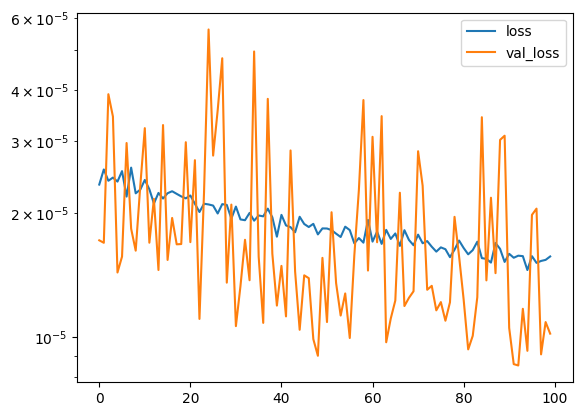

In [132]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
#plt.xlabel('Epoch')
#plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.yscale('log')
plt.legend(loc='upper right')

Finding the last epoch in the training folder

In [133]:
#filefolder= 'training_6'

folders=os.listdir('training/'+filefolder)
#folders=os.listdir('training/'+'training_0/')

sub='index'
folders = [x for x in folders if re.search(sub, x)]

ts=[]
for folder in folders:
    a=re.search('\d{2,3}',folder)
    ts.append(int(a.group(0)))
    #print(a.group(0))
index_max=np.max(ts)
print(index_max)
latest = [x for x in folders if re.search(str(index_max), x)]

latest=latest[0].split('.index')
print(latest[0])

99
vae_best_model_relu.epoch99-loss0.00002.w


In [134]:
#weights_path='training/training_28/vae_best_model_relu.epoch29-loss0.00002.w'
weights_path='training/'+filefolder+'/'+latest[0]

#weights_path='training/'+'training_0'+'/'+latest[0]

print(weights_path)
model.load_weights(weights_path)

training/training_34/vae_best_model_relu.epoch99-loss0.00002.w


In [135]:
test=model.predict(test_data)

11/11 [==============================] - 1s 62ms/step


In [136]:
print(label_test.shape[0])
n=5
print('max:' , np.max(test[:,:,:,n]))
print('min:' , np.min(test[:,:,:,n]))
#label_test=label_test.reshape((36,66,256,4))
#plt.imshow(np.clip(label_test[1,:,:,3],0,1))

345
max: 0.6570493
min: 2.4596927e-11


In [137]:
test1=test*normal
label_test1=label_test*normal

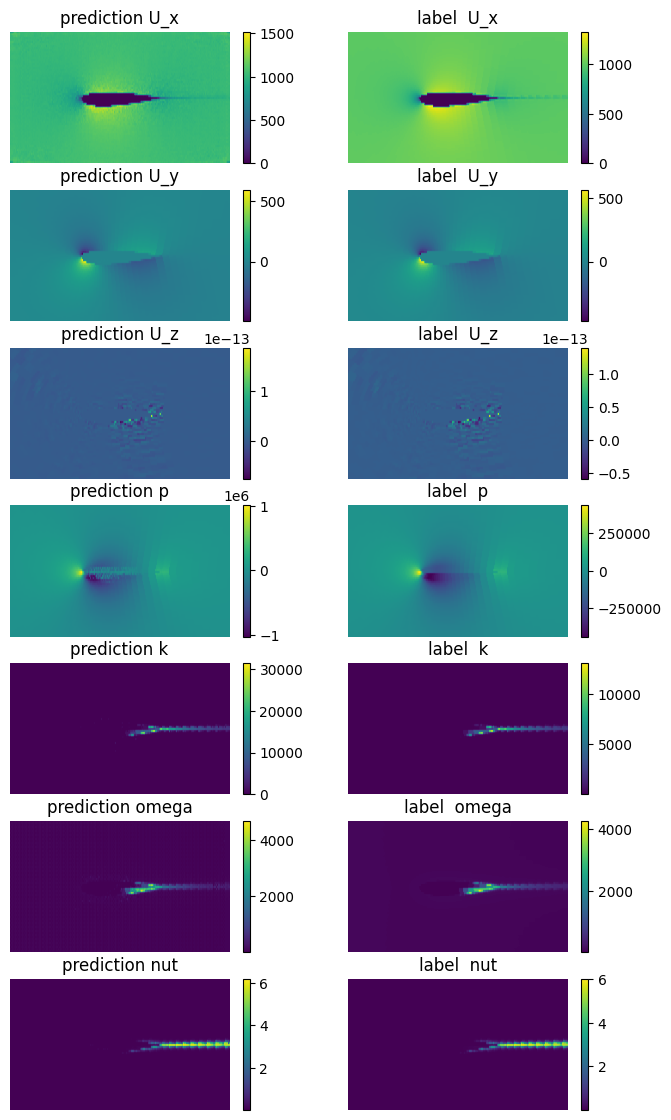

In [138]:
n=23
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=test.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']


for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(test1[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('prediction ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(label_test1[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('label  '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

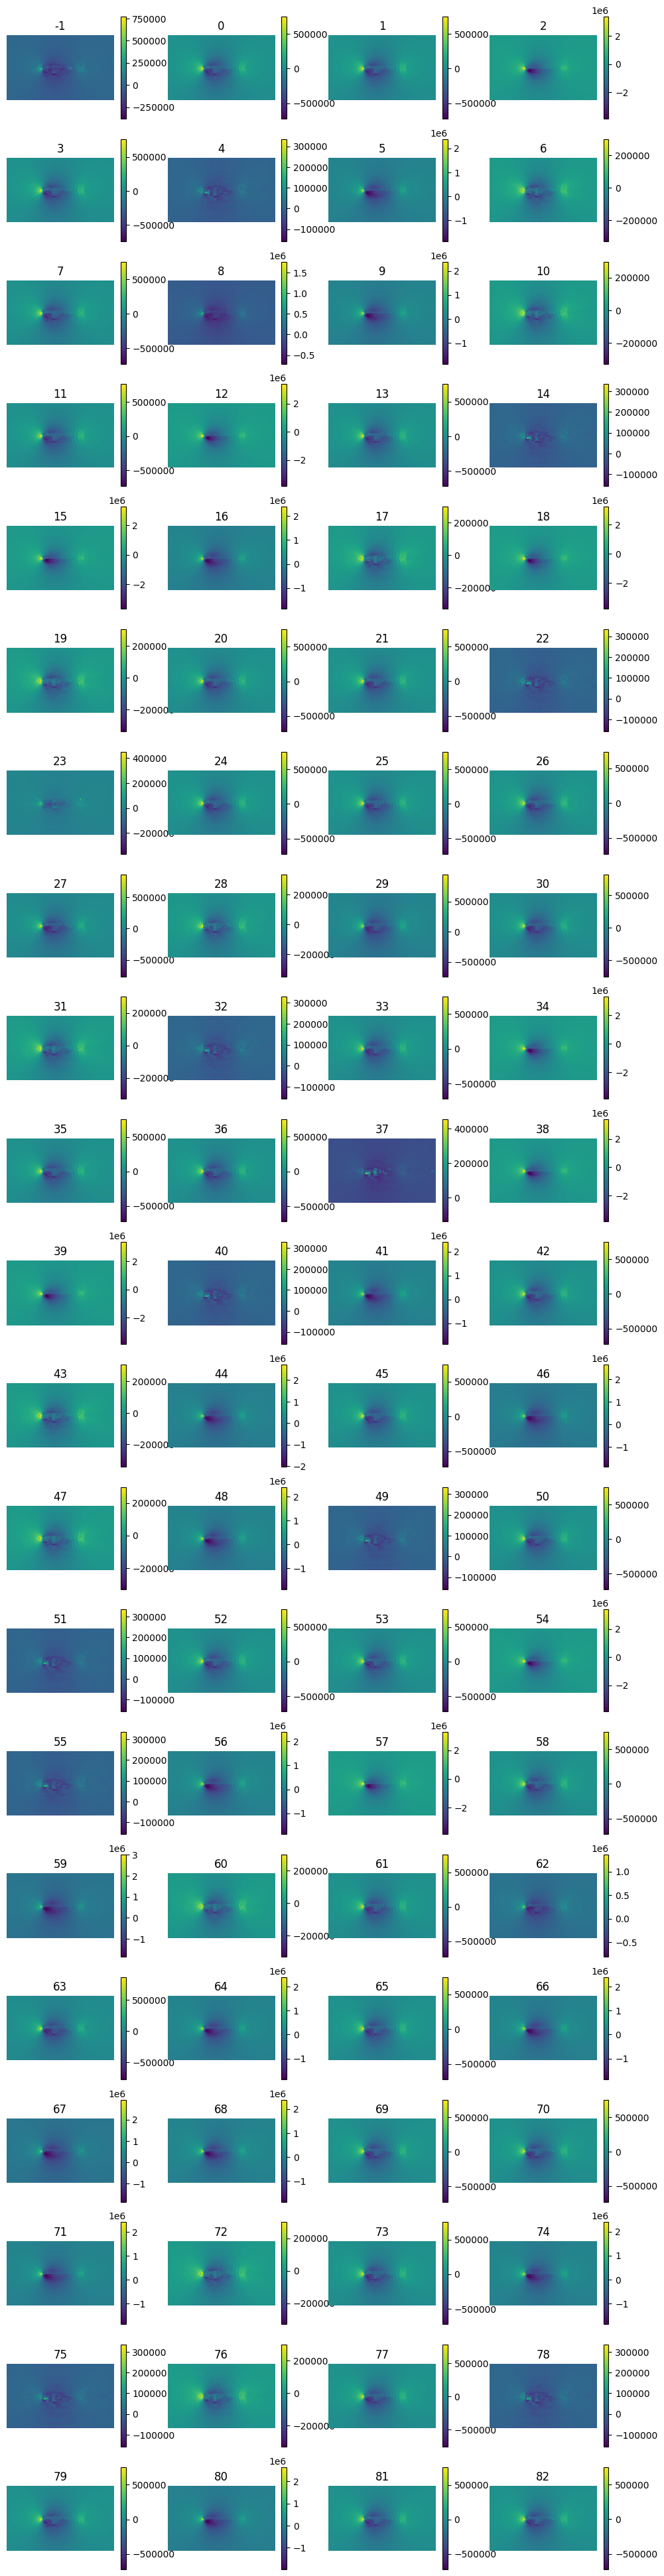

In [102]:
[a,b,c,d]=test.shape
fig = plt.figure(figsize=(12, 50))
columns = 4
rows = 21

for i in range( columns * rows):
    img = test[(i-1),:,:,3]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(i-1)
    plt.axis('off')
    plt.colorbar()
plt.show()
    

In [78]:
mse=[]
ssim1=[]
for i in range(label_test.shape[0]):
    mse.append(mean_squared_error(test[i,:,:,3],label_test[i,:,:,3]))
    ssim1.append(ssim(test[i,:,:,3],label_test[i,:,:,3]))
print('max mse:'+ str(max(mse)))
print(ssim1[n])
print(mse[n])
mse=np.mean(mse)
ssim2=np.mean(ssim1[:])
print('average ssim: '+str(ssim2))
print('average mse: '+str(mse))

C:\Users\hansi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


max mse:9.58870668816349e-06
0.9994876737713814
2.1063803063410987e-07
average ssim: 0.9989828735890596
average mse: 5.161009385046328e-07


In [129]:
#os.mkdir('cfdnetplus_models')
model.save('cfdnetplus_models/model_mse_rmsprop')

INFO:tensorflow:Assets written to: cfdnetplus_models/model_mse_rmsprop\assets


INFO:tensorflow:Assets written to: cfdnetplus_models/model_mse_rmsprop\assets
